In [1]:
import sys
sys.path.append('/Volumes/SANDISK128/Documents/Thesis/Python/')
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np 
import pandas as pd
import datetime
from datetime import date
import calendar
import math

import TPU_savefig as PF
import calc_date as cd
import autolabel_bar as ab
import save_fig as SF
import get_Haukeli_obs_data as obsDat


%matplotlib inline 

In [2]:
savefig = 1
txtdir = '../../Retrieval'
txt_filename = '201612.Haukeliseter_SC_copy.txt'
figdir = '../../Observations_results/Haukeli_weathermast/'
form = 'png'


In [3]:
### define colors for colorbar
champ = 255
blue = np.array([1,74,159])/champ           # for the date


In [ ]:
df, temp, wind_u, wind_v, year, month, day = osbDat.create_Hauk_obs(txtdir, txt_filename)

In [11]:
# --------- calculate daily mean of wind  -------------------------------------------------------------------------
wind_u_day = np.nanmean(wind_u, axis = 0)
wind_v_day = np.nanmean(wind_v, axis = 0)

/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Volumes/SANDISK128/Applications/anaconda/envs/py36ECMWF/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# --------- calculate daily accumulation -------------------------------------------------------------------------
df_day = []
for k in range(0,31):
    df_day.append(df[-1,k] - df[0,k])


In [13]:
# --------- calculate Tmax, Tmin -------------------------------------------------------------------------
Tmax = []
Tmin = []
for k in range(0,31):
    for i in range(0,4):
        t_idx = temp[i*60*6 : (i+1)*60*6, k]
        Tmax.append(np.nanmax(t_idx))
        Tmin.append(np.nanmin(t_idx))

# --------- calculate Tmean every 6hours -------------------------------------------------------------------------
t_mean = []
for i in range(0,4):
    t_6 = temp[i*60*6 : (i+1)*60*6, :]
    t_mean.append(np.nanmean(t_6, axis = 0))
t_mean = pd.DataFrame.from_dict(t_mean)
t_mean = pd.melt(t_mean)



In [14]:
calday, calmon = cd.get_dayname(year[0],month[0],day[0])
fig_name = 'T_P_U_%s%s.png' %(year[0],month[0])

In [15]:
prec_tick = np.arange(0,round(np.nanmax(df_day))+5,5)

In [16]:
T = np.arange(round(np.nanmin(t_mean)-1),round(np.nanmax(t_mean)+1),5)

In [17]:
X = np.arange(0.5,31)
Y = np.zeros((np.asarray(day).shape[0]))



In [20]:
df_day = np.asarray(df_day)
days = np.arange(0,31)
days = days[~np.isnan(df_day)]
df_day = df_day[~np.isnan(df_day)]
days = days[np.where(df_day > 0.05)]
df_day = df_day[np.where(df_day > 0.05)]

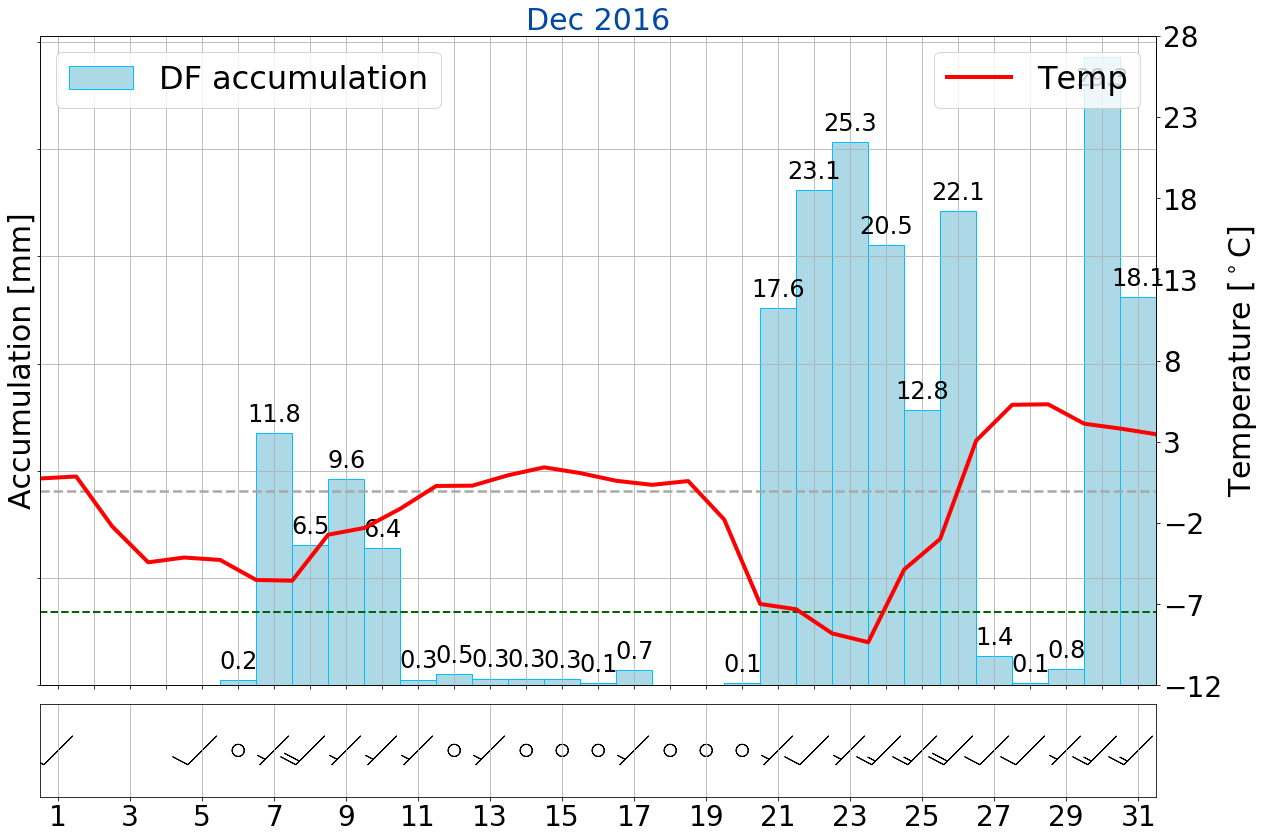

In [21]:
fig = plt.figure(figsize = (20,14))
fs = 30
gs = gridspec.GridSpec(7,1)
ax1 = fig.add_subplot(gs[:6,:])


barfont = fs-6
yfont = fs
tickfont = fs-2
legenfont = fs+2
# Precipitation

bar = ax1.bar(days,df_day,width = 1,align='edge',label = 'DF accumulation', color='lightblue',
              edgecolor ='deepskyblue')
ab.autolabel(bar,ax1,barfont)
ax1.grid()
plt.setp(ax1.get_xticklabels(), visible=False)

# Temperature
ax2 = ax1.twinx()
line = ax2.plot(np.arange(0,4*31), t_mean['value'],color = 'r',label='Temp',linewidth = 4)
#linemin = ax2.plot(np.arange(0,4*31), Tmin, color = 'b', label = 'Temp$_{min}$', linewidth = 2, linestyle= '--')
#linemax = ax2.plot(np.arange(0,4*31), Tmax, color = 'darkred', label = 'Temp$_{max}$', linewidth = 2, linestyle= '--')
ax2.axhline(y = 0., c ='darkgray', linewidth = 2.5, zorder = 0, linestyle = '--')
ax2.axhline(y = -7.5, c ='darkgreen', linewidth = 2, zorder = 0, linestyle = '--')

# labeling Precip
ax1.set_ylabel('Accumulation [mm]',fontsize = yfont)
#ax1.set_yticklabels(prec_tick,fontsize = tickfont)
ax1.set_xticks(np.asarray(day)-0.5)
ax1.set_xticklabels(day, fontsize=tickfont)
ax1.set_xlim([0,31])
ax1.set_ylim([0.,np.nanmax(df_day)+1])
ax1.legend(loc='upper left', fontsize=legenfont )
plt.setp(ax1.get_yticklabels(), visible=False)

    # labeling Temp
ax2.set_yticks(T)
ax2.set_ylabel('Temperature [$^\circ$C]',fontsize = yfont)
ax2.tick_params(axis='both', which= 'major', labelsize=tickfont)
ax2.legend(loc='upper right', fontsize = legenfont )

    
# Wind
# share x only
ax3 = plt.subplot(gs[6,:])#, sharex=ax1)

ax3.barbs(X,Y,wind_u_day, wind_u_day, length = 9, pivot='middle')
# labeling Wind
ax3.axes.get_yaxis().set_visible(False)
ax3.tick_params(axis='both', which= 'major', labelsize=tickfont)
ax3.set_xticks(np.asarray(day[::2])-0.5)
ax3.set_xticklabels(np.asarray(day[::2]), fontsize=tickfont)
ax3.set_xlim([0,31])
ax3.set_ylim([-0.001,0.001])
ax3.grid()
        
ax1.set_title('%s %s' %(calmon, (year[0])),fontsize=fs, color=blue)
if savefig == 1:
    SF.save_figure_landscape(figdir, fig_name, form )
plt.show()